<a href="https://colab.research.google.com/github/mohmaed7777/K-means-for-clustering-the-Stars-Typs/blob/main/Clustering_Stars_Types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set()
print('<===============Setup is Done===================>')

<===============Setup is Done===================>


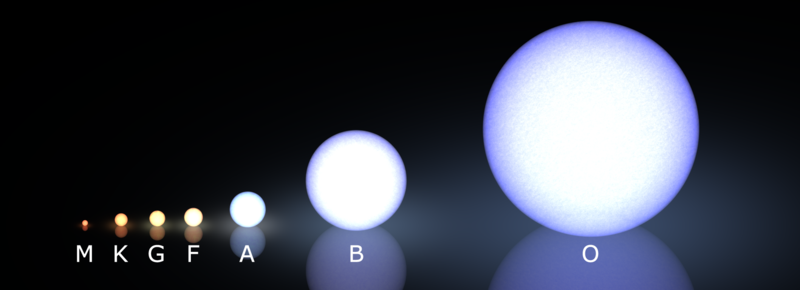

Temperature -- K

L -- L/Lo

R -- R/Ro

AM -- Mv

Color -- General Color of Spectrum

Spectral_Class -- O,B,A,F,G,K,M / SMASS
 - https://en.wikipedia.org/wiki/Asteroid_spectral_types
Type -- Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants



from 0 to 5

**-Red Dwarf - 0**

**-Brown Dwarf - 1**

**-White Dwarf - 2**

**-Main Sequence - 3**

**-Super Giants - 4**

**-Hyper Giants - 5**


In [25]:
data = pd.read_csv('/content/Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


#**Explorotary Data Analysis:-**

**1- Dropout unwanted Column:-**

In [26]:
data.drop(['Type'], axis=1, inplace=True)

**2-Determine Unique Values in the DataFrame:-**

In [27]:
data.nunique()

Temperature       228
L                 208
R                 216
A_M               228
Color              17
Spectral_Class      7
dtype: int64

**3- Get Info About the Data:-**

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 11.4+ KB


**4-Checkout How many missing values Do we have?:-**

In [29]:

data.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64

**5-Counts of unique values:-**

In [30]:
 data.Color.value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Orange                  2
Whitish                 2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Yellowish               1
Blue-White              1
Orange-Red              1
Name: Color, dtype: int64

In [31]:
data.Spectral_Class.value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

**6- Scatter Plot to Show Tempreture Level among Spectral Class & Colors:-**

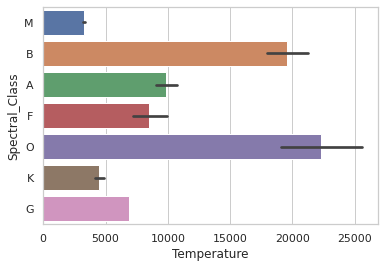

In [32]:
# Set theme
sns.set_style('whitegrid')
 
# BarChart
sns.barplot(x='Temperature', y='Spectral_Class', data=data)

**7- Categorical Data Desriptions:-**

In [33]:
data.describe(include='object')

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


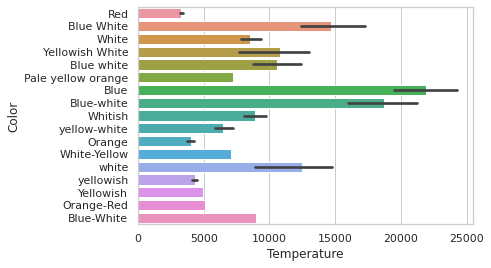

In [34]:
sns.barplot(x='Temperature', y='Color', data=data)

**8-Numarical Data Description:-**

In [35]:
data.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396
std,9552.425037,179432.244940,517.155763,10.532512
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000865,0.102750,-6.232500
50%,5776.000000,0.070500,0.762500,8.313000
75%,15055.500000,198050.000000,42.750000,13.697500
max,40000.000000,849420.000000,1948.500000,20.060000


**9- Transform Categorical Features Into Numaric type:-**

In [36]:
df_uniques = data.nunique()


In [37]:
categorical_vals  = list(df_uniques[(df_uniques > 2) & (df_uniques <=20)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Color', 'Spectral_Class']

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
lebel_encoder = LabelEncoder()

In [40]:
for col in categorical_vals:
  data[col] = lebel_encoder.fit_transform(data[col])


**10-Read The Data After Encoding:-**

In [41]:
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,8,5
1,3042,0.000500,0.1542,16.60,8,5
2,2600,0.000300,0.1020,18.70,8,5
3,2800,0.000200,0.1600,16.65,8,5
4,1939,0.000138,0.1030,20.06,8,5


In [42]:
# Declare feature vector and target variable : 
X = data
y = data['Spectral_Class']

In [43]:
# Feature Scaling : 
cols = X.columns

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max = MinMaxScaler()

In [46]:
X = min_max.fit_transform(X)

In [47]:
X = pd.DataFrame(X, columns=[cols])

In [48]:
X.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,0.029663,2.731275e-09,0.000083,0.876798,0.5,0.833333
1,0.028980,4.944550e-10,0.000075,0.891807,0.5,0.833333
2,0.017367,2.590003e-10,0.000048,0.957473,0.5,0.833333
3,0.022622,1.412729e-10,0.000078,0.893371,0.5,0.833333
4,0.000000,6.828189e-11,0.000049,1.000000,0.5,0.833333


In [49]:
from sklearn.cluster import KMeans


In [102]:
# Kmeans model with K=6 :- 

K_model = KMeans(n_clusters=6, random_state=0)
K_model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [103]:
# K-means model parameters study:-
K_model.cluster_centers_

array([[3.93570369e-01, 3.42200079e-01, 3.60758944e-02, 1.78657826e-01,
        1.02272727e-01, 9.65909091e-01],
       [4.04178329e-01, 2.04450486e-02, 8.71520238e-03, 5.33660131e-01,
        1.28676471e-01, 1.27450980e-01],
       [3.22172886e-02, 1.26081820e-08, 1.17355736e-04, 8.39389974e-01,
        4.98456790e-01, 8.31275720e-01],
       [4.82667297e-02, 2.80991735e-01, 7.03740062e-01, 6.22388993e-02,
        4.85000000e-01, 8.06666667e-01],
       [1.60269042e-01, 4.83687172e-06, 3.29148100e-04, 6.41655843e-01,
        7.90865385e-01, 3.01282051e-01],
       [6.19489362e-01, 5.50861040e-01, 7.35910115e-01, 7.97854428e-02,
        1.82692308e-01, 4.61538462e-01]])

In [104]:
y_means = K_model.fit_predict(X)
y_means

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 4,
       4, 4, 1, 4, 1, 4, 4, 4, 0, 1, 1, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 1, 1, 1, 1, 1,
       4, 1, 4, 4, 4, 4, 1, 1, 2, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 5, 3, 3,
       0, 5, 1, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
      dtype=int32)

In [105]:
# Get the inertia: 
K_model.inertia_

22.57574277516588